# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Greatlearning/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape

print('The dataset has', df.shape[0], 'number of rows and', df.shape[1], 'columns' )

The dataset has 1898 number of rows and 9 columns


#### Observations:

The dataset has 1898 number of rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The dataset has 5 numerical datatype( float type = 1 and integer type = 4) and 4 object(categorical) datatype.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# there are no missing value because all non-null count corresponds to the number of rows
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

- There are no missing values.
- Rating has some values as 'Not given' but all the values in the column are in str format, it is considered as a categorical format.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,"1,898.00","1,477,495.50",548.05,"1,476,547.00","1,477,021.25","1,477,495.50","1,477,969.75","1,478,444.00"
customer_id,"1,898.00","171,168.48","113,698.14","1,311.00","77,787.75","128,600.00","270,525.00","405,334.00"
cost_of_the_order,"1,898.00",16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,"1,898.00",27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,"1,898.00",24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

- The minimum food preparartion time is 20 minutes.
- The average food preparation time is 27.37 minutes, approximately 27minutes
- The maximum food preparation time is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
orders_not_rated = df[(df['rating'] == 'Not given')].value_counts().sum()
print('The number of orders not rated are', orders_not_rated )

The number of orders not rated are 736


#### Observations:

- 736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###**EXPLORE THE NUMERICAL VARIABLES**

####**Observation on cost of the order**

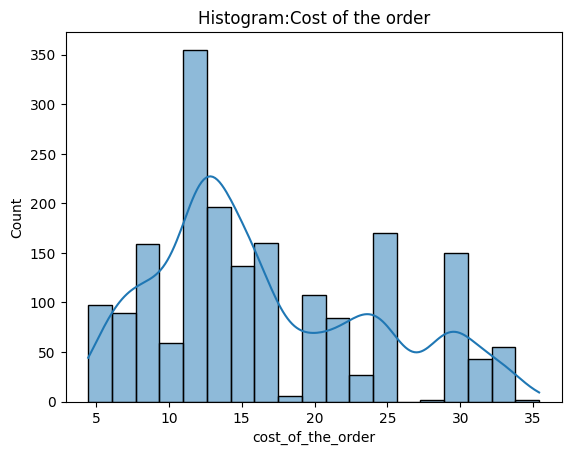

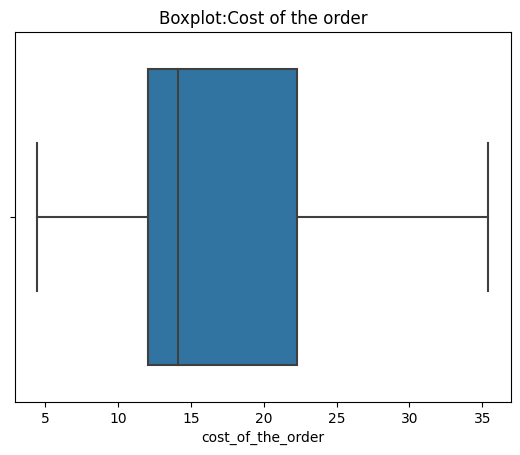

In [9]:
# Excluding order_id and customer_id, there are 3 numerical variables that can be observed.
# explore and observe  cost_of_order using histogram
plt.title('Histogram:Cost of the order')
sns.histplot(data = df, x = 'cost_of_the_order', kde = True)
plt.show()

# Explore and observe cost of the order using boxplot
plt.title('Boxplot:Cost of the order')
sns.boxplot(data = df, x = 'cost_of_the_order')
plt.show()


####Observations:
- The distribution of cost_of_the_order is right skewed and there are no outliers.
- From the histogram chart, the mode of the data is around 12 dollars.
- 50 percent of cost of orders placed by customers are below 15 dollars.
- 75 percent of cost of orders placed by customers are below 25 dollars.
- Lowest number of customers placed an order that cost 35 dollars.

####**Observation on food preparation time**

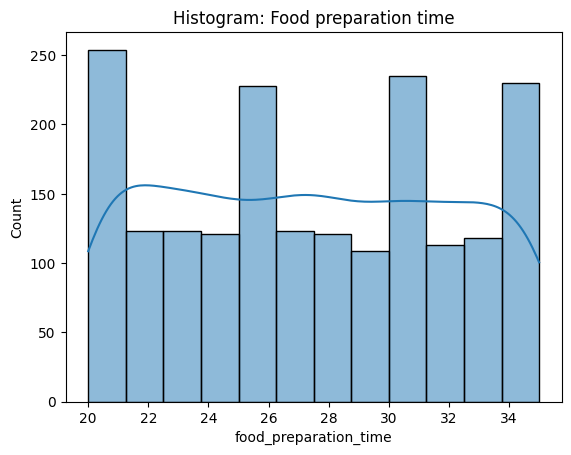

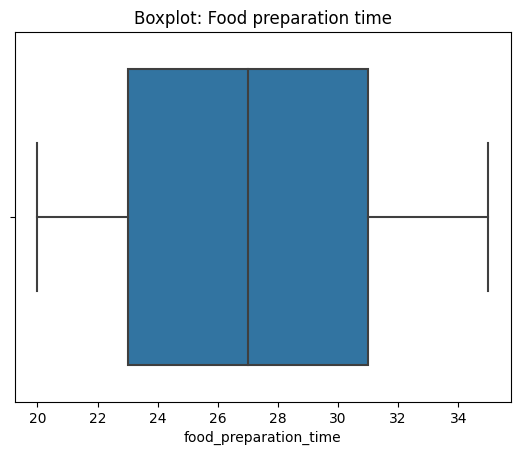

In [10]:
# Explore and observe food_preparation_time using histplot
plt.title('Histogram: Food preparation time')
sns.histplot(data = df, x = 'food_preparation_time', kde = True)
plt.show()

# Explore and observe food preparation time using boxplot
plt.title('Boxplot: Food preparation time')
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show()

####Observations:

- Food preparation time data distribution is symmetrical.
- From the histogram, the mode of the data is about 21 minutes.
- Food preparation time is mostly between 20 - 34 minutes, though some took more than 34 minutes to be prepared.
- There are no outliers in food_preparation_time distribution.
- 50 percent of the food preparation time takes less than 28 minutes and 75 percent of the food preparation time takes less than 32 minutes.
- From the boxplot, the mediam of the data is around 27 minutes.


####**Observation on delivery time**

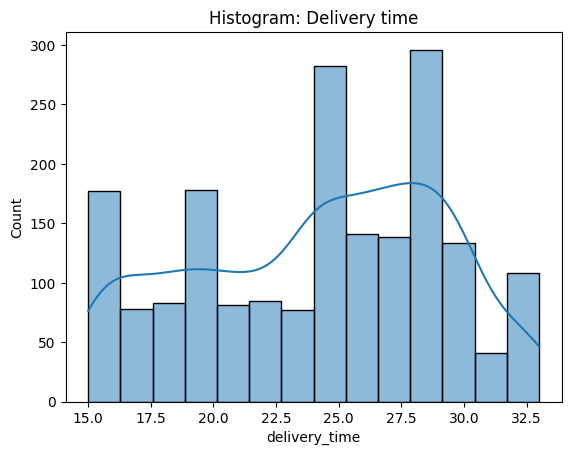

<Axes: title={'center': 'Boxplot: Delivery time'}, xlabel='delivery_time'>

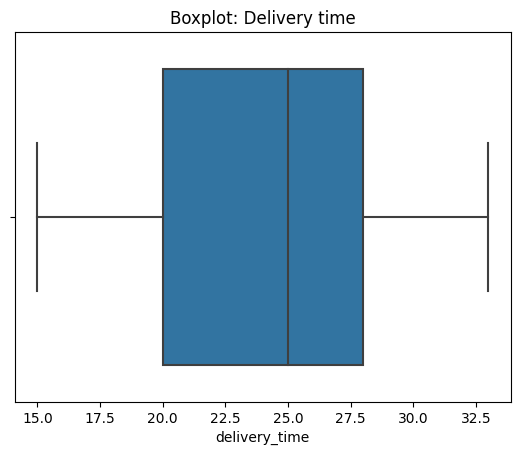

In [12]:
# Explore and observe delivery_time using histogram
plt.title('Histogram: Delivery time')
sns.histplot(data = df, x = 'delivery_time', kde = True)
plt.show()

# Explore and observe delivery time using boxplot
plt.title('Boxplot: Delivery time')
sns.boxplot(data = df, x = 'delivery_time')


####Observations:

- The data distribution is slightly left skrewed and there are no outliers.
- From the histogram, the mode of the data is around 29 minutes.
- The mean of the data is 25 minutes.
- 50 percent of the delivery time takes 25 minutes.

###**EXPLORE THE CATEGORICAL COLUMN**

####**Observation on cuisine type**

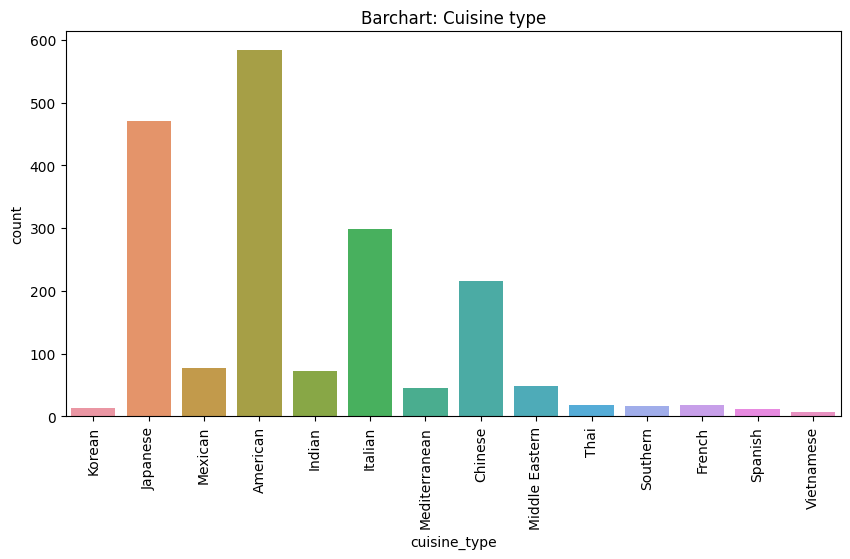

In [13]:
# Explore the categorical datatype
# the dataset has 4 categorical datatype... restaurant_name, cuisine_type, day_of_the_week and rating
# The number of restaurant is too big to analyse with barchart.
plt.figure(figsize=(10,5))
plt.title('Barchart: Cuisine type')
sns.countplot(data = df, x = 'cuisine_type')
plt.xticks(rotation = 90)
plt.show()


####Observations:

- American cuisine type received the highest order, followed by Japanese cuisine while Vietnamese cuisine recieved the least order.

####**Observation on day of the week**

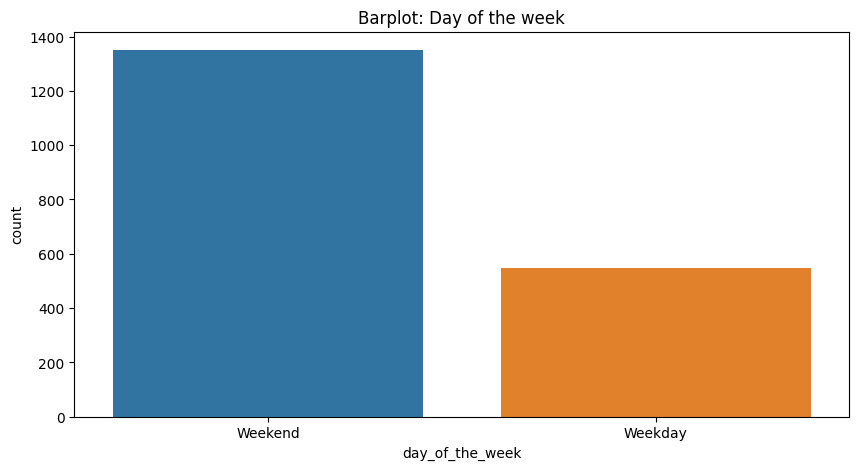

In [14]:
# Explore and observe day of the week using barchart
plt.figure(figsize=(10,5))
plt.title('Barplot: Day of the week')
sns.countplot(data = df, x = 'day_of_the_week')
plt.show()


####Observations:

- Majority of the orders are placed during the weekend.
- Weekend orders are more than twice higher than the number of orders placed during weekday

####**Observation on rating**

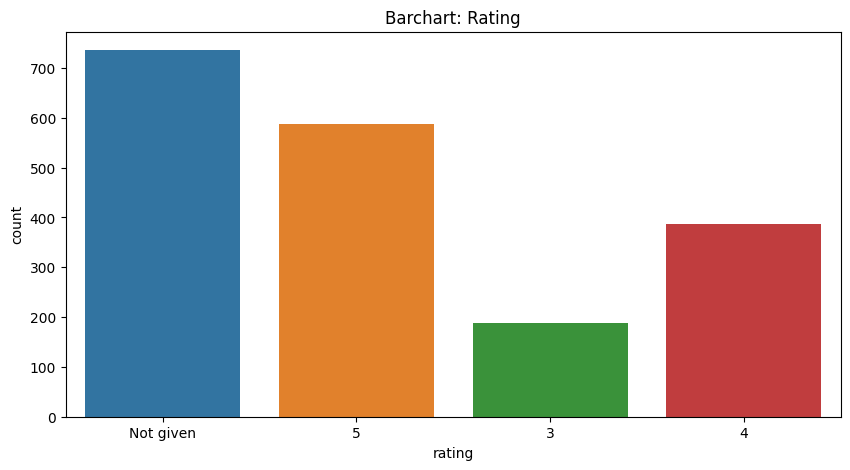

In [15]:
# Explore and observe rating
plt.figure(figsize=(10,5))
plt.title('Barchart: Rating')
sns.countplot(data = df, x = 'rating')
plt.show()


####Observations:

- Majority of the orders placed were not rated by the customers and least number of orders was rated '3'.
- From the graph, it is observed that most of the customers are satisfied with the orders they received.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
Top_5_restaurants = df['restaurant_name'].value_counts().head(5)
Top_5_restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

####Observations:

- The list of the top 5 restaurants in terms of number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [17]:
# Create a sub data df1 to filter Weekend from the day of the week.
df1 = df[(df['day_of_the_week'] == 'Weekend')]
# find the cuisine type with the highest number of counts
df1['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

- American cuisine_type is the most popular cuisine on Weekends, it has a maximum of 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Find the number of rows with orders greater than 20 dollars then divide by the total rows and multiply by 100 to get the percentage value.
percentage_orders_above_20_dollars = (df.loc[df['cost_of_the_order'] > 20].shape[0]/df.shape[0])*100
print('Approximately',round(percentage_orders_above_20_dollars,1),'percent of the orders cost more than 20 dollars')

Approximately 29.2 percent of the orders cost more than 20 dollars


#### Observations:

- Approximately 29.2 percent of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# Find the mean order delivery time
mean_deliv_time = df['delivery_time'].mean()
print('The mean order delivery time is approximately',round(mean_deliv_time,0))

The mean order delivery time is approximately 24.0


#### Observations:

- The mean order delivery time is approximately 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Find top 3 most frequent customers
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

- The top three most frequent customers with their ID numbers are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


###**EXPLORE RELATIONSHIP BETWEEN NUMERICAL VARIABLES**


####**Observation on relationship between the cost of the order and food preparation time**

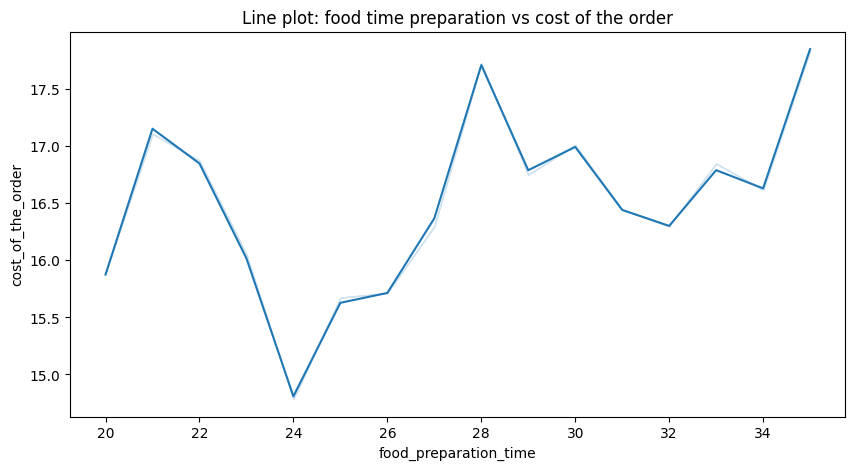

In [20]:
# Explore and observe the relationship between cost of the order and food preparation time using line plot
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'food_preparation_time', y = 'cost_of_the_order', errorbar=('ci', False))
plt.title('Line plot: food time preparation vs cost of the order')
plt.show()

####Observations:

- There is no steady relationship between the cost of order and food preparation time but the graph shows that mostly, food preparation time increases as cost of order increases.
- Cost of the order below 15 dollars took around 24 minutes to be prepared.


####**Observation on relationship between cost of the order and delivery time**

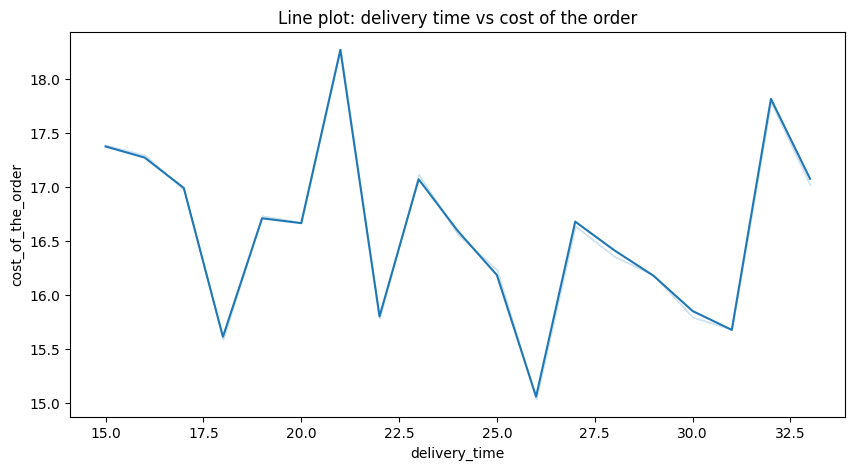

In [21]:
# Explore and observe the relationship between cost of the order and delivery time using line plot
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'delivery_time', y = 'cost_of_the_order', errorbar=('ci', False))
plt.title('Line plot: delivery time vs cost of the order')
plt.show()

####Observations:

- The lower cost of the order seems to take longer time to deliver, but generally there is a very weak relationship between the two variables.

###**EXPLORING RELATIONSHIP BETWEEN NUMERICAL AND CATEGORICAL VARIABLES**

####**Observation on cuisine type and cost of the order**

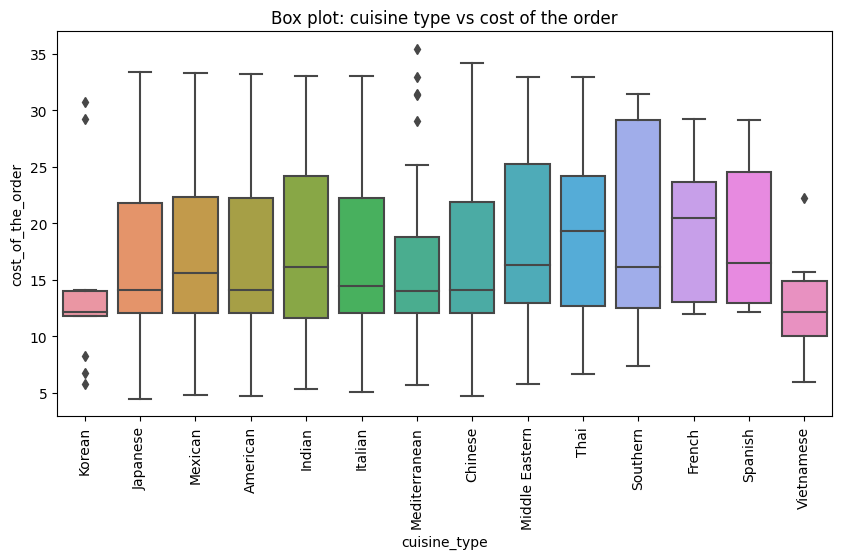

In [22]:
# Explore and observe the relationship between the cuisine type and cost of the order using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 90)
plt.title('Box plot: cuisine type vs cost of the order')
plt.show()

####Observations:

- There are extreme outliers in the cost of the order for Korean cuisine type and 75 percent of orders placed for korean cuisine type cost below 15 dollars.
- Southern cuisine is the most expensive with 75 percent of order cost of around 28 dollars.
- Korean and Vietnamese cuisine have the least cost of the order.
- Mediterranean cuisine has outliers with a maximiun cost of the order at 35 dollars.

####**Observation on cuisine type and food preparation time**

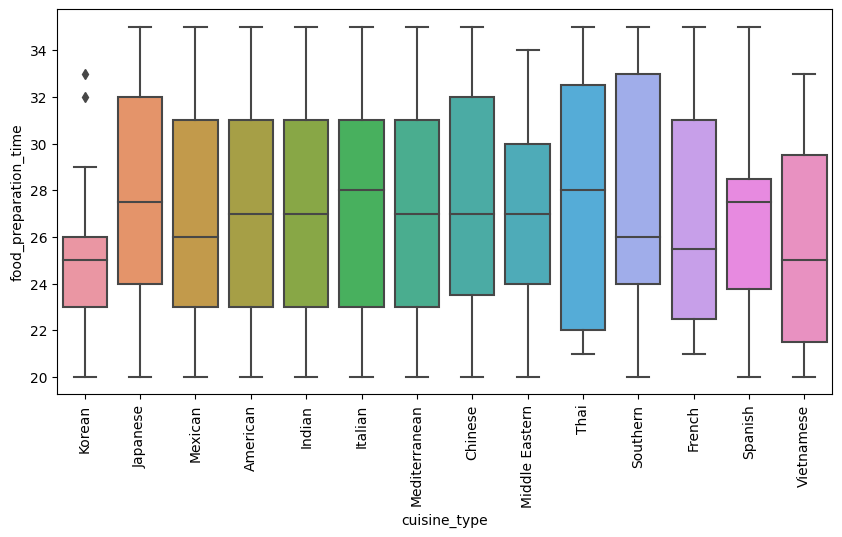

In [23]:
# Explore and observe the relationship between the cuisine type and food preparation time using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time')
plt.xticks(rotation = 90)
plt.show()

####Observations:

- Korean cuisine took least time to be prepared, 75 percent of korean cuisine took 26 minutes to be prepared
- 75 percent of Thai and southern cruisine type takes longer to be prepared when compared to other cuisine type.

####**Observation on day of the week and food delivery time**

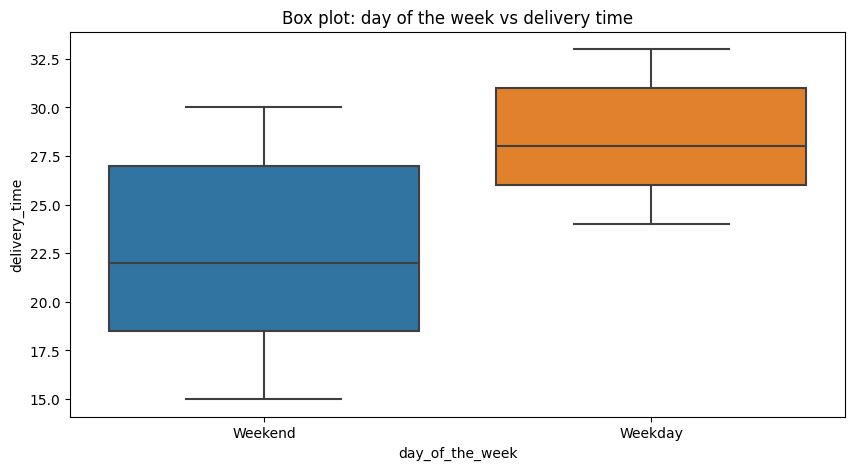

In [24]:
# Explore and observe the relationship between the day of the week and food delivery time using boxplot
plt.figure(figsize=(10,5))
plt.title('Box plot: day of the week vs delivery time')
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
plt.show()

####Observations:

- It takes longer time to deliver order during the weekday than the weekend.
- 75 percent of orders delivered during the weekend takes less than 27.5 minutes

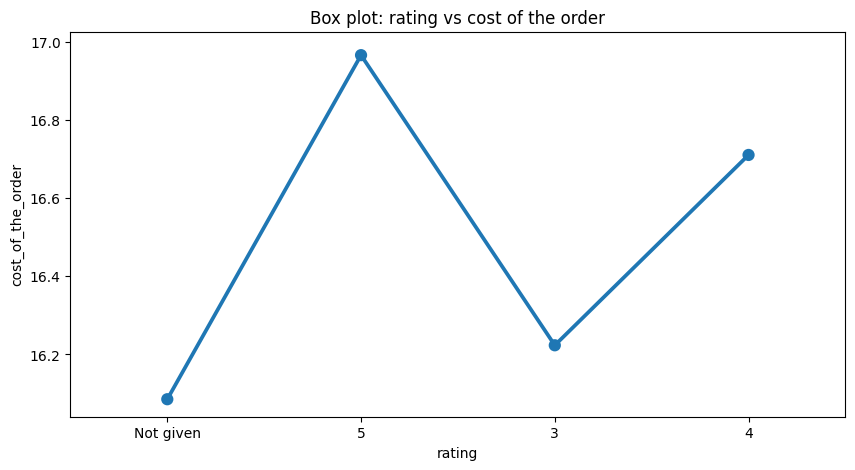

In [25]:
# Explore and observe the relationship between rating and cost of the order using pointplot
plt.figure(figsize=(10,5))
plt.title('Box plot: rating vs cost of the order')
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order', errorbar=('ci', False))
plt.show()

####Observations:

- The higher the cost of the order, the higher the rating received.
- On average, expensive food received high rating.

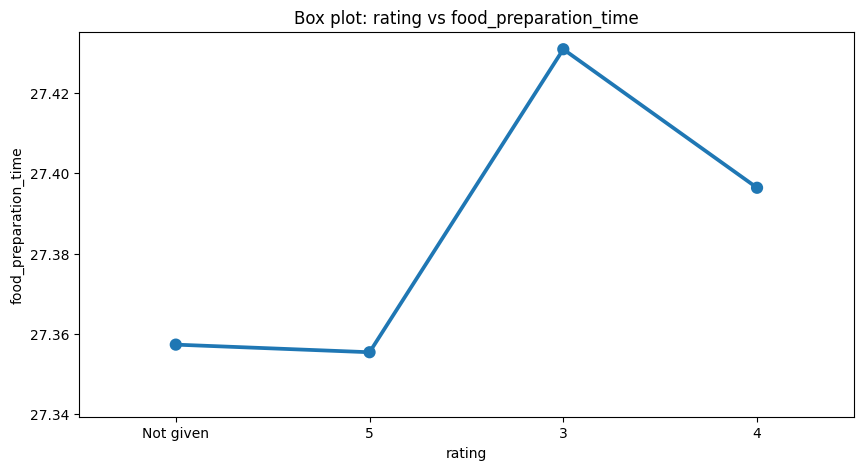

In [27]:
# Explore and observe the relationship between rating and food preparation time using pointplot
plt.figure(figsize=(10,5))
plt.title('Box plot: rating vs food_preparation_time')
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time', errorbar=('ci', False))
plt.show()

####Observations:

- On average, there is no meaningful effect of rating on food preparation time.

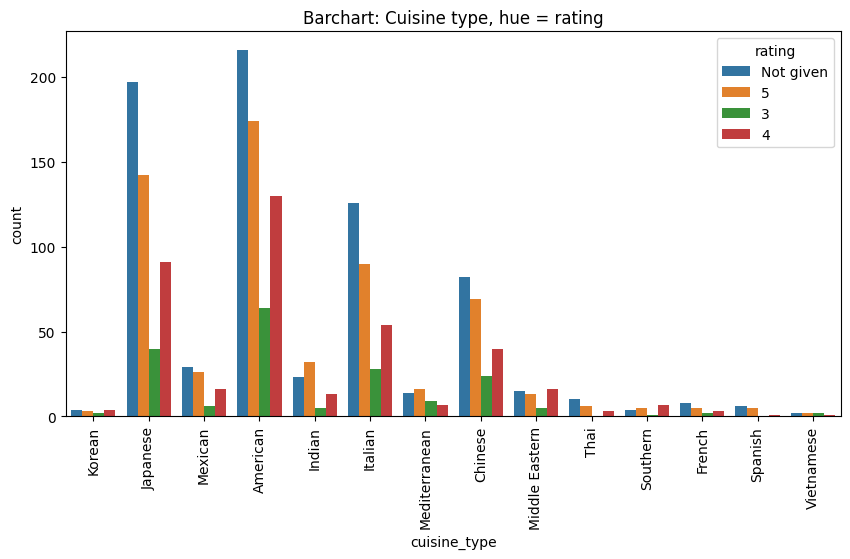

In [28]:
plt.figure(figsize=(10,5))
plt.title('Barchart: Cuisine type, hue = rating')
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating')
plt.xticks(rotation = 90)
plt.show()

In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

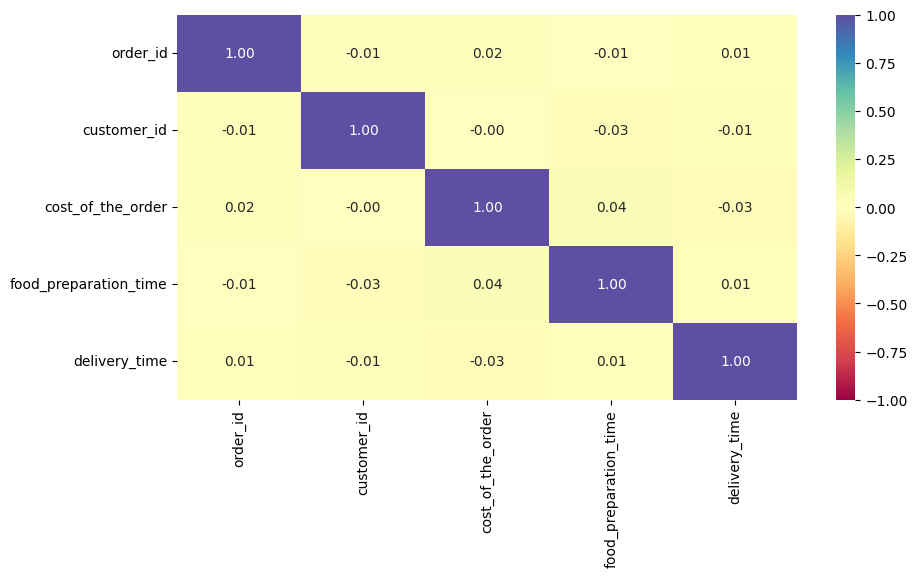

In [30]:
corr = df.corr()

# plot the heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####Observations:

- There are insignificant correlation between all the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [31]:
# Create a sub data df2 to filter orders that are rated
df2 = df[(df['rating'] != 'Not given')].copy()

# convert 'rating' to numerical datatype
df2['rating'] = df2['rating'].astype('int')

# create a dataset with the restaurant name and their rating count
df_rating_by_restaurant = df2.groupby('restaurant_name')['rating'].count().reset_index().sort_values(by = ['rating'], ascending = False)

# Rename 'rating' column to 'rating_count'
df_rating_by_restaurant.rename(columns = {'rating':'rating_count'}, inplace = True)
df_rating_by_restaurant.head()

,restaurant_name,rating_count
117,Shake Shack,133
132,The Meatball Shop,84
17,Blue Ribbon Sushi,73
16,Blue Ribbon Fried Chicken,64
104,RedFarm Broadway,41


In [32]:
# Find the mean of 'rating'
df_mean = df2.groupby('restaurant_name')['rating'].mean().reset_index().sort_values(by = ['rating'], ascending = False)

# Remane 'rating' column to rating_mean
df_mean.rename(columns = {'rating':'rating_mean'}, inplace = True)
df_mean.head()

,restaurant_name,rating_mean
0,'wichcraft,5.00
103,Ravagh Persian Grill,5.00
33,Chola Eclectic Indian Cuisine,5.00
34,Chote Nawab,5.00
71,Junoon,5.00


In [33]:
# Input 'rating_mean' in the dataset df_rating_by_restaurant
df_rating_by_restaurant['rating_mean'] = df_mean['rating_mean']
df_rating_by_restaurant.head()

,restaurant_name,rating_count,rating_mean
117,Shake Shack,133,4.28
132,The Meatball Shop,84,4.51
17,Blue Ribbon Sushi,73,4.22
16,Blue Ribbon Fried Chicken,64,4.33
104,RedFarm Broadway,41,4.24


In [34]:
# Filter the restaurants that have rating count above 50 and rating mean above 4
df_rating_by_restaurant[(df_rating_by_restaurant['rating_count']>50)&(df_rating_by_restaurant['rating_mean']>4)]

,restaurant_name,rating_count,rating_mean
117,Shake Shack,133,4.28
132,The Meatball Shop,84,4.51
17,Blue Ribbon Sushi,73,4.22
16,Blue Ribbon Fried Chicken,64,4.33


#### Observations:

- The restaurants that fulfil the criteria to get the promotional offer are Shake Shack, The meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [35]:
# Write a function to find the revenue
def compute_revenue(y):
  if y > 20:
    return y*0.25
  elif y > 5:
    return y*0.15
  else:
    return y*0
 # Apply the function on the cost of the order column
df['revenue'] = df['cost_of_the_order'].apply(compute_revenue)
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74


In [36]:
# Find the total revenue
total_revenue = df['revenue'].sum()
total_revenue
print('The net revenue generated by the company is approximately', round(total_revenue,2), 'dollars')

The net revenue generated by the company is approximately 6166.3 dollars


#### Observations:

- The net revenue generated by the company is approximately 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [37]:
# Create a column in dataset df and input the total time required to deliver the food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

# Filter the order that takes more than 60 minutes,divide the number of rows by total number of rows, then multiply by 100
percentage_orders_above_60_mins = (df[(df['total_time'] > 60)].shape[0]/df.shape[0])*100
print('The percentage of orders that takes more than 60 minutes to be delivered is', round(percentage_orders_above_60_mins,1),'percent')

The percentage of orders that takes more than 60 minutes to be delivered is 10.5 percent


#### Observations:

- The percentage of orders that takes more than 60 minutes to be delivered is 10.5 percent

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [38]:
# find the mean delivery time on weekdays
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations:

- The mean delivery time during the Weekday and Weekend are 28.34 minutes and 22.47 minutes respectively.
- On average, it took approximately more 6 minutes to deliver food during the Weekday than during the Weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The dataset from the FoodHub has been extracted and analysed through descriptive analysis and data visualization. This is to get a fair idea about the demand of different restaurants which will help them in improving the customers experience. After the analysis, the following insights have been drawn
*  More orders are placed during the weekend than the weekday.
*  American cuisine type are the most popular in demand, followed by Japanese cuisine type.
*  Majority of the customers do not rate the orders they received.
*  Average delivery time takes longer during the weekday than the weekend.
*  Top 4 restaurants in terms of number of reviews and rating received from customers are Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken. They have average rating above 4.
*  There are insignificant relationships between the numerical variables.
*  Majority of the orders are rated higher, it shows general satisfaction of the customers.

### Recommendations:

*  Since more orders are placed during the weekend, the company should ensure that they have sufficient delivery persons to attend to the customers.
*  They should ensure that delivery persons are stationed closed to different restaurants with higher orders in order to minimize the delivery time.
*  More restaurants should be encouraged to add American and Japanese cuisine to their menu since the cuisine type are in higher demand.
*  The number of orders that were not rated are very high.FoodHub should encourage customers to write reviews about the orders they received so that they can get more understanding of the customers feelings about their orders. They can give few percentage discount to customers that rated their order.

In [46]:
!pip install nbconvert